<a href="https://colab.research.google.com/github/Gnome101/MAT_422/blob/main/Module_2_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.4.1. MLE for random samples

The Maximum Likelihood Estimation(MLE) for random samples is a statistical method to estimate the parameters of a probability distribution from a set of observed data.

MLE works by finding the parameter values that maximize the likleihood function.

The likelihood function $L(θ)$ represents the probability of observing a given set of of data as a function of the parameters $\theta$ of the underlying probility distribution. Its the **joint probability** of observing the entire sample.

Essentially, the MLE is used to derive the parameters of a probability distribution.

If the MLE cannount be found easily then it can also be found using numerical methods like gradient descent.

Steps to find the MLE for random samples


1.   Define the likelihood function, in our case its the probabilities of each data point $L(Θ) = Π_{i=1}^nf(x_i|θ)$. For this, $f(x)$ denotes the pdf or pmf of the distribution,
2.   Take the log of the likelihood function: $ℓ(θ) = log L(θ) = ∑_{i=1}^nlogf(x_i | θ )$
3.  Then you can differentiate the logliklegood function with respect to the parameters $\theta$. Ideally you would then solve for 0 to find the maximum.




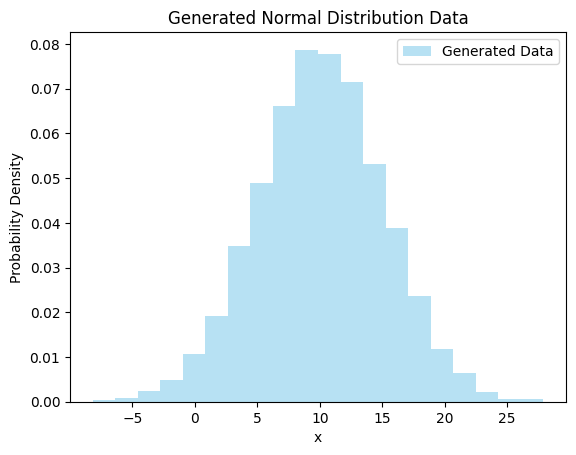

Actual Mean: 10.00 vs Predicted Mean 10.10
Actual StDev:5.00  vs Predicted StDev 5.04


In [13]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

acutal_mean = 10
actual_stdev = 5

actual_norm = np.random.normal(acutal_mean,actual_stdev,10000) # mean, stdev, size

# Gene# Plot the generated data on a histogram to visualize the normal distribution
plt.hist(actual_norm, bins=20, density=True, alpha=0.6, color='skyblue', label='Generated Data')


# Add labels and title
plt.title('Generated Normal Distribution Data')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()

# Display the plot
plt.show()
#We can find the mean and stdev for this plot
pred_mean = np.mean(actual_norm)
pred_std_dev = np.std(actual_norm)

print(f"Actual Mean: {acutal_mean:.2f} vs Predicted Mean {pred_mean:.2f}")
print(f"Actual StdDev:{actual_stdev:.2f}  vs Predicted StdDev {pred_std_dev:.2f}")

The PMF for a binomial distribution is

$P(X = k |n,p) = (^n_k)p^k(1-p)^{n-k}$

Sp the likelihood function is the product of those probabilities

$L(n,p) = ∏_{i=1}^N(^n_{x_i})p^{x_i}(1-p)^{n-{x_i}}$

We can then take the logarithm of the liklihood to find the log-likelihood

$ℓ(n,p)=\sum_{i=1}^N\log(^n_{x_i}) + {x_i}\log(p) + (n-x_i)\log(1-p)$

In [ ]:
def negative_log_likelihood(params, data):
    # Parameters to optimize
    n_trials = int(np.round(params[0]))  # Ensure n_trials is an integer
    p_success = params[1]

    # Check that the probability is in the valid range
    if p_success <= 0 or p_success >= 1 or n_trials <= 0:
        return np.inf

    # Calculate the negative log-likelihood
    log_likelihood = np.sum(stats.binom.logpmf(data, n_trials, p_success))

    return -log_likelihood  # We minimize, so return the negative

In [49]:
import numpy as np
import scipy.stats as stats
from scipy.optimize import minimize

# Function to calculate the negative log-likelihood for binomial distribution given n_trials
def negative_log_likelihood_fixed_n(p_success, n_trials, data):

    # Calculate the log-likelihood
    log_likelihood = np.sum(stats.binom.logpmf(data, n_trials, p_success))
    # We then make it negative so that we can find the minimum
    return -log_likelihood

# Parameters for the binomial distributin
n_true = 20
p_true = 0.6

# Create the binomial distribution data
data = np.random.binomial(n_true, p_true, 1000)

# Grid search approach to find the best n_trials by minimizing the negative log-likelihood
best_n = None
best_p = None
best_log_likelihood = np.inf

n_range = range(1, 50)  # Possible values for n_trials (1 to 100)

#We are essentially trying all n_trial amounts in this range to determine the most likely
#n_trials and success

for n_trials in n_range:
    # Use optimization for p_success with current n_trials
    #First we give our func, then an inital guesss, then the additional args, we also bound our guess as its a probability
    result = minimize(negative_log_likelihood_fixed_n, 0.5, args=(n_trials, data), bounds=[(0.01, 0.99)])
    if(result.success == False):
      continue
    # print(result.x,result.fun)
    p_estimated = result.x[0]

    # Get the negative log-likelihood for this (n_trials, p_success) pair
    current_log_likelihood = result.fun

    # Check if this is the best (lowest) log-likelihood found so far
    if current_log_likelihood < best_log_likelihood:
        best_n = n_trials
        best_p = p_estimated
        best_log_likelihood = current_log_likelihood

# Print the estimated values
print(f"Estimated n_trials: {best_n}")
print(f"Estimated p_success: {best_p:.4f}")
# Print the actual values for comparison
print(f"Actual n_trials: {n_true}")
print(f"Actual p_success: {p_true}")


Estimated n_trials: 20
Estimated p_success: 0.6004
Actual n_trials: 20
Actual p_success: 0.6


# 2.4.2. Linear regression

This is a statistical method used to model the relationship between a dependent variable and one ore more independent variables.

For simple linear regression there is only one independent and dependent variable. The model can be shown as

$y = mx + b$

$y$ is the dependent variable

$x$ is the independent variable

$b$ is the intercept or the value of $y$ when  $x = 0$

$m$ is the slope or how much $y$ changes per unit change of $x$

Within linear regression, the goal is to find the best fitting line that minimizes the difference between the predicted values and the actual observed values. This difference is known as the residual. This is tyipcally done by minimizing the sum of squared residuals.

This sum can be shown by $∑_{i = 1}^n(y_i - ŷ_i)^2$

In this expression, $y_i$ is the observed value and $ŷ_i$ is the predicted value.


The goal is to find parameters $m$ and $b$ such that the sum is minimized.




Actual Slope: 200.00 vs Predicted Slope: 198.74


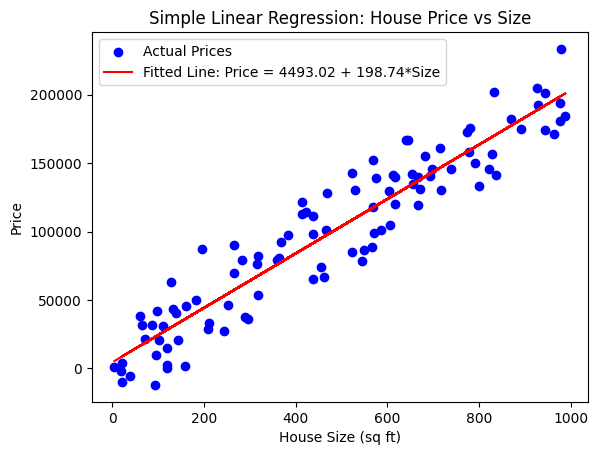

In [24]:
# We will do a simple example of linear regression
from sklearn.linear_model import LinearRegression
# The goal will be to find the correlation between house size and price
np.random.seed(0)
house_size = np.random.rand(100, 1) * 1000  # House sizes between 0 and 1000 sq ft

actual_slope = 200
actual_intercept = 50
actual_price_equation = actual_intercept + actual_slope * house_size
price_equation_noise = actual_price_equation + np.random.randn(100, 1) * 20000

#Instatiate a linear regression model
model = LinearRegression()

# Train the model
model.fit(house_size, price_equation_noise)

# Make predictions based on the house sizes
predicted_price = model.predict(house_size)

slope = model.coef_[0][0]
intercept = model.intercept_[0]

plt.scatter(house_size, price_equation_noise, color='blue', label="Actual Prices")
plt.plot(house_size, predicted_price, color='red', label=f"Fitted Line: Price = {intercept:.2f} + {slope:.2f}*Size")

plt.title("Simple Linear Regression: House Price vs Size")
plt.xlabel("House Size (sq ft)")
plt.ylabel("Price")
plt.legend()

print(f"Actual Slope: {actual_slope:.2f} vs Predicted Slope: {slope:.2f}")

plt.show()